Asteroids are the one of the important materials of the solar systems. Some of them are also near to the earth. Some times they may be dangerous and can hit the earth and damage the surface. The near-earth asteroids are mainly of Four types. such as apollo, Athens.......... 

Our main focus is to analyze some asteroid data and build a model, which helps to predict if it is any near- earth asteroids. For this, we will take the help of some machine learning algorithm 

# Importing necessary Modules

In [1]:
%matplotlib inline
import pandas as pd      #for CSV file import
import numpy as np       # for calculation of linear Algebra
import os  # creating interface with OS


# Loding Data 

In [2]:
# read the CSV file from the directory location

df = pd.read_csv(r'E:\datasets\asteroid_diameter\Asteroid_Updated.csv')

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#For taking the necessary data from the large dataframe and create another new dataframe containing only the NEAR EARTH ASTEROIDS

df_new=df.loc[(df['class'] == 'AMO') | (df['class'] == 'APO') |(df['class'] == 'AST') | (df['class'] == 'ATE')]

In [4]:
#seeing the data

df_new.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
432,Eros,1.458112,0.222736,10.828567,304.306263,178.821360,1.133339,1.782886,1.760738,45762.0,...,0.531,NaN,S,S,0.46,0.149341,AMO,0.559780,643.109416,47.239460
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
886,Alinda,2.476488,0.569116,9.384536,110.428481,350.414323,1.067080,3.885896,3.897288,37095.0,...,0.436,NaN,NaN,S,-0.12,0.086571,AMO,0.252901,1423.484304,193.414345
1035,Ganymed,2.664145,0.533235,26.687613,215.557505,132.396356,1.243531,4.084760,4.348556,34631.0,...,0.417,NaN,S,S,0.30,0.343497,AMO,0.226656,1588.310093,274.156198
1220,Amor,1.919416,0.435321,11.876530,171.337230,26.674820,1.083854,2.754978,2.659266,31628.0,...,NaN,NaN,NaN,NaN,NaN,0.107716,AMO,0.370638,971.296846,250.280309


In [5]:
df_new.shape

(21464, 31)

Our new dataset has contain only 21464 rows and only 31 columns

In [6]:
# Finding the Null values in the dataset

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21464 entries, 432 to 839709
Data columns (total 31 columns):
name              163 non-null object
a                 21464 non-null float64
e                 21464 non-null float64
i                 21464 non-null float64
om                21464 non-null float64
w                 21464 non-null float64
q                 21464 non-null float64
ad                21464 non-null float64
per_y             21464 non-null float64
data_arc          21264 non-null float64
condition_code    21463 non-null object
n_obs_used        21464 non-null int64
H                 21457 non-null float64
neo               21464 non-null object
pha               21462 non-null object
diameter          857 non-null object
extent            9 non-null object
albedo            811 non-null float64
rot_per           1362 non-null float64
GM                4 non-null float64
BV                38 non-null float64
UB                38 non-null float64
IR             

Now we have to understand the Columns meaning

full_name- Object full name/designation

a- semi-major axis(au)

e- eccentricity

G- Magnitude slope parameter

i- Inclination with respect to x-y ecliptic plane(deg)

om- Longitude of the ascending node

w- argument of perihelion

q- perihelion distance(au)

ad- aphelion distance(au)

per_y- Orbital period

data_arc- data arc-span(d)

condition_code- Orbit condition code

n_obs_used- number of observations used

H- Absolute Magnitude parameter

diameter- Diameter of asteroid(Km)

extent- Object bi/tri axial ellipsoid dimensions(Km)

albedo- geometric albedo

rot_per- Rotation Period(h)

GM- Standard gravitational parameter, Product of mass and gravitational constant

BV- Color index B-V magnitude difference

UB- Color index U-B magnitude difference

IR- Color index I-R magnitude difference

spec_B- Spectral taxonomic type(SMASSII)

spec_T- Spectral taxonomic type(Tholen)

neo- Near Earth Object

pha- Physically Hazardous Asteroid

moid- Earth Minimum orbit Intersection Distance(au)

class- Asteroid types

But some of the attributes such as- spectral types, Hazardous types, Near earth types, name, condition_code etc. are not required to detect this final classification, so we need to drop these columns

In [7]:
# drop the object id columns, they are of no use in the analysis

df_new.drop(['spec_B','spec_T','neo','pha','condition_code','extent','name'], axis=1, inplace=True)

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
#new size of dataset

df_new.shape

(21464, 24)

In [9]:
# change the diameter column type from the object to float type

df_new['diameter']=df_new['diameter'].astype('float')

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#check for the Null values

df_new.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc        200
n_obs_used        0
H                 7
diameter      20607
albedo        20653
rot_per       20102
GM            21460
BV            21426
UB            21426
IR            21463
G             21451
moid              2
class             0
n                 0
per               0
ma                0
dtype: int64

In [11]:
#fill the null value with the mean of the each columns

df_new.fillna(df_new.mean())

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,GM,BV,UB,IR,G,moid,class,n,per,ma
432,1.458112,0.222736,10.828567,304.306263,178.821360,1.133339,1.782886,1.760738,45762.0,8146,...,0.000446,0.921000,0.5310,-0.33,0.460000,0.149341,AMO,0.559780,643.109416,47.239460
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,1825,...,0.000112,0.814263,0.4165,-0.33,0.111538,0.203359,AMO,0.229932,1565.680891,48.317252
886,2.476488,0.569116,9.384536,110.428481,350.414323,1.067080,3.885896,3.897288,37095.0,1243,...,0.000112,0.832000,0.4360,-0.33,-0.120000,0.086571,AMO,0.252901,1423.484304,193.414345
1035,2.664145,0.533235,26.687613,215.557505,132.396356,1.243531,4.084760,4.348556,34631.0,6153,...,0.000112,0.842000,0.4170,-0.33,0.300000,0.343497,AMO,0.226656,1588.310093,274.156198
1220,1.919416,0.435321,11.876530,171.337230,26.674820,1.083854,2.754978,2.659266,31628.0,467,...,0.000112,0.814263,0.4165,-0.33,0.111538,0.107716,AMO,0.370638,971.296846,250.280309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839698,0.968957,0.106548,26.928326,222.535034,319.535974,0.865717,1.072197,0.953816,2.0,13,...,0.000112,0.814263,0.4165,-0.33,0.111538,0.050395,ATE,1.033350,348.381441,228.988188
839699,1.275189,0.389368,21.154860,43.357914,268.471700,0.778671,1.771707,1.440025,2.0,17,...,0.000112,0.814263,0.4165,-0.33,0.111538,0.042004,APO,0.684451,525.969140,48.092958
839700,2.489182,0.537183,0.154366,181.040866,217.287538,1.152037,3.826328,3.927292,2.0,15,...,0.000112,0.814263,0.4165,-0.33,0.111538,0.159094,AMO,0.250968,1434.443495,1.913453
839701,1.412395,0.372764,6.167745,359.518341,328.781719,0.885906,1.938885,1.678582,4.0,20,...,0.000112,0.814263,0.4165,-0.33,0.111538,0.038303,APO,0.587178,613.101963,34.515712


In [12]:
# now again check for the NULL values in the columns

df_new.isna().values.any()

True

In [13]:
# For the easy understanding and to remove the miscalculation we drop the features having more than three-fourth NAN values

tooMuchNull = df_new.columns[df_new.isna().sum()/df_new.shape[0] > 0.75]
df_new = df_new.drop(tooMuchNull,axis=1)

In [14]:
#fill the null value with the mean of the each columns

df_new=df_new.fillna(df_new.mean())

In [15]:
# now again check for the NULL values in the columns

df_new.isna().values.any()

False

In [16]:
df_new.isnull().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
moid          0
class         0
n             0
per           0
ma            0
dtype: int64

In [17]:
df_new.shape

(21464, 16)

So now there is no null values in the dataframe having only 16 features.

# Data Visualization

For this again we have to import some necessary modules

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

3-D visualization

In [19]:
AMO = df_new[df_new['class']=='AMO']
APO = df_new[df_new['class']=='APO']
ATE = df_new[df_new['class']=='ATE']
AST = df_new[df_new['class']=='AST']

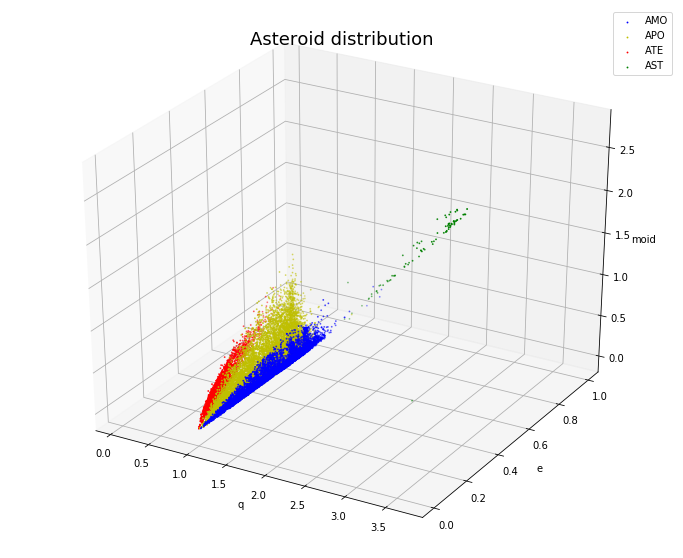

In [20]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(AMO['q'],AMO['e'],AMO['moid'], s = 0.7, color = 'b', label = 'AMO')
ax.scatter(APO['q'],APO['e'],APO['moid'], s = 0.7, color = 'y', label = 'APO')
ax.scatter(ATE['q'],ATE['e'],ATE['moid'], s = 0.7, color = 'r', label = 'ATE')
ax.scatter(AST['q'],AST['e'],AST['moid'], s = 0.7, color = 'g', label = 'AST')
ax.set_xlabel('q')
ax.set_ylabel('e')
ax.set_zlabel('moid')
ax.set_title('Asteroid distribution',fontsize=18)
plt.legend()
plt.show()

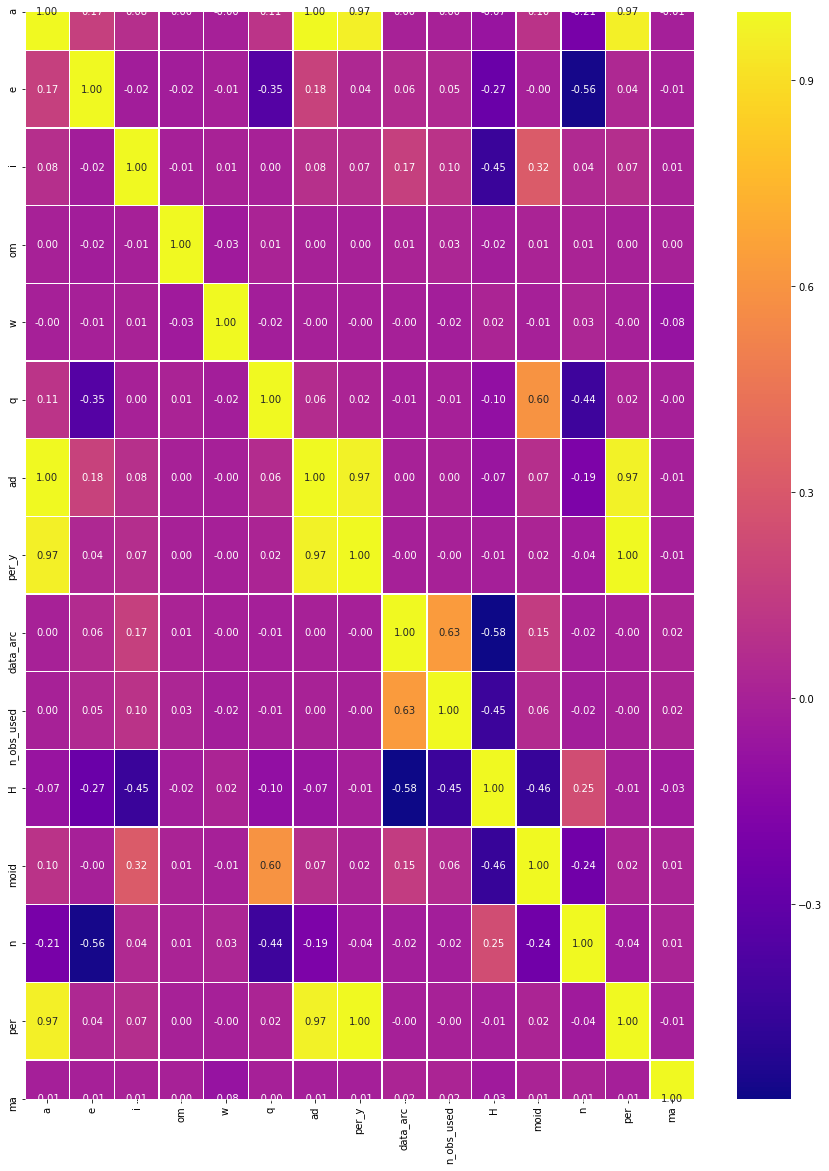

In [21]:
#plot heatmap to show the pearson correlation coefficient and detect the highly correlated columns

f,ax = plt.subplots(figsize=(15,20))
sns.heatmap(df_new.corr(), annot=True,linewidths=.5, fmt= '.2f',ax=ax,cmap="plasma")
plt.show()

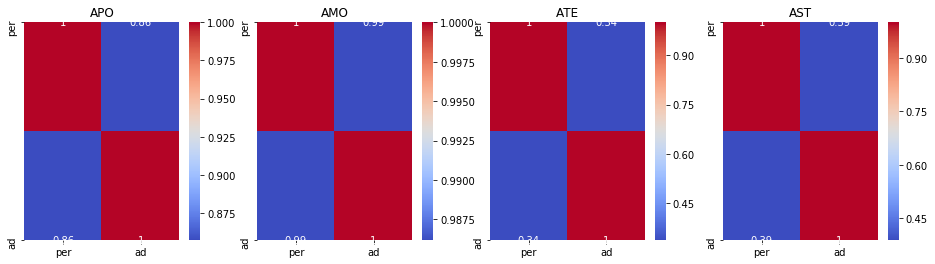

In [22]:
annot_kws={'verticalalignment':'center','horizontalalignment':'center'}

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
#fig.set_dpi(100)
ax = sns.heatmap(df_new[df_new['class']=='APO'][['per','ad']].corr(), ax = axes[0], \
                 cmap='coolwarm', linecolor='white', annot=True,annot_kws= annot_kws)
ax.set_title('APO')

ax = sns.heatmap(df_new[df_new['class']=='AMO'][['per','ad']].corr(), ax = axes[1], \
                 cmap='coolwarm', linecolor = 'white', annot=True,annot_kws= annot_kws)
ax.set_title('AMO')

ax = sns.heatmap(df_new[df_new['class']=='ATE'][['per','ad']].corr(), ax = axes[2], \
                 cmap='coolwarm', linecolor = 'white', annot=True,annot_kws= annot_kws)
ax = ax.set_title('ATE')

ax = sns.heatmap(df_new[df_new['class']=='AST'][['per','ad']].corr(), ax = axes[3], \
                 cmap='coolwarm', linecolor = 'white', annot=True,annot_kws= annot_kws)
ax = ax.set_title('AST')

In [23]:
# dropping per and ad column

df_new.drop(['per','ad'], axis=1, inplace=True)

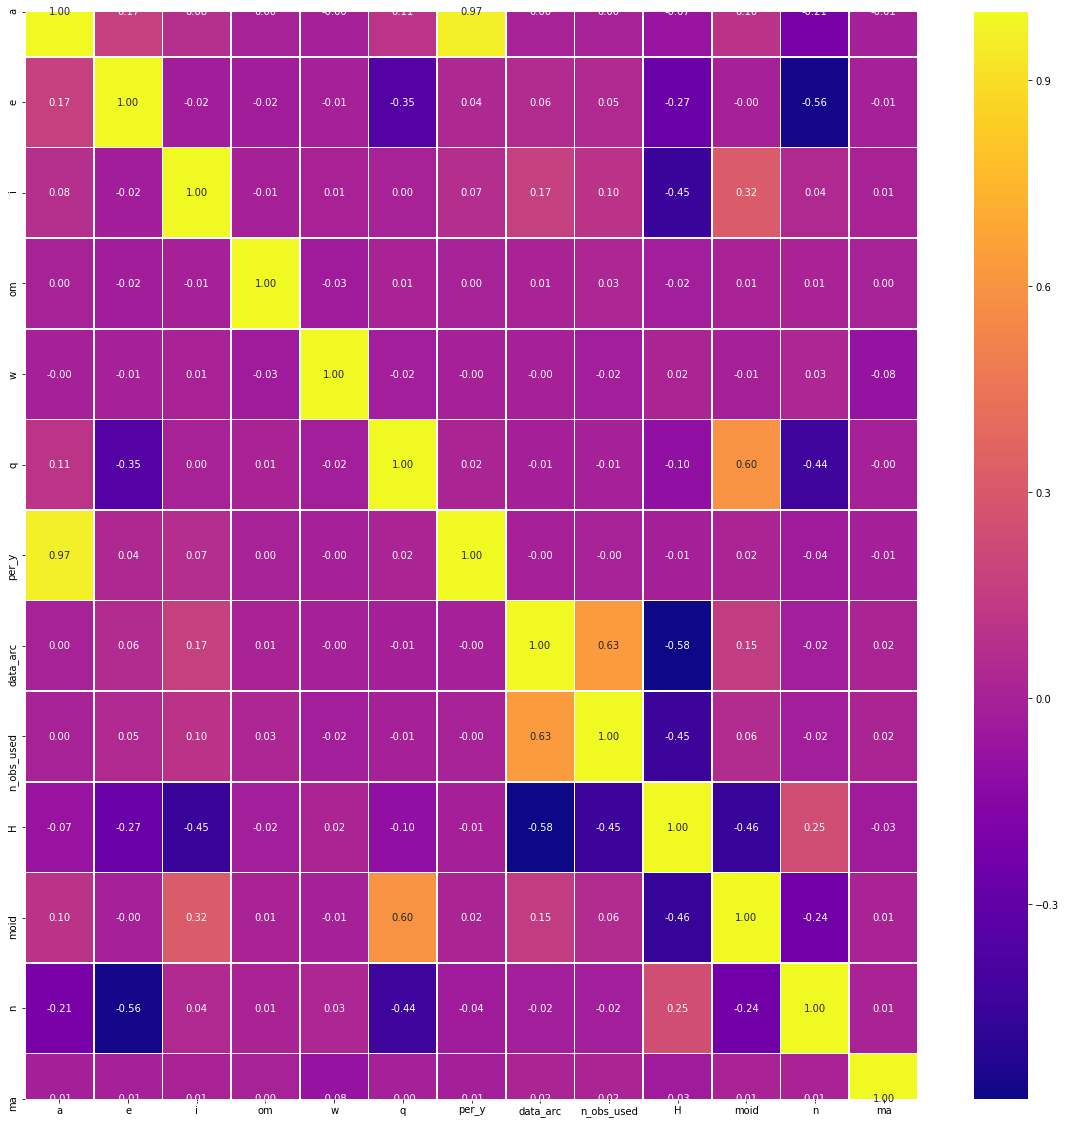

In [24]:
# now the final heatmap

f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_new.corr(), annot=True,linewidths=.5, fmt= '.2f',ax=ax,cmap="plasma")
plt.show()

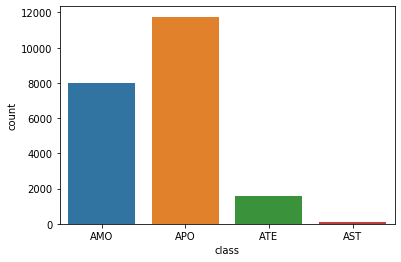

In [25]:
# total number of the elements in the each class

ax1=sns.countplot(df_new['class'])

It shows the maximum number of asteroids in the near earth orbital is of APO class while only few are of AST class.

Now we have to find the plot and the on the basis of Earth Minimum orbit Intersection Distance('moid') with the class column

for that we chose scatter plot and barplot

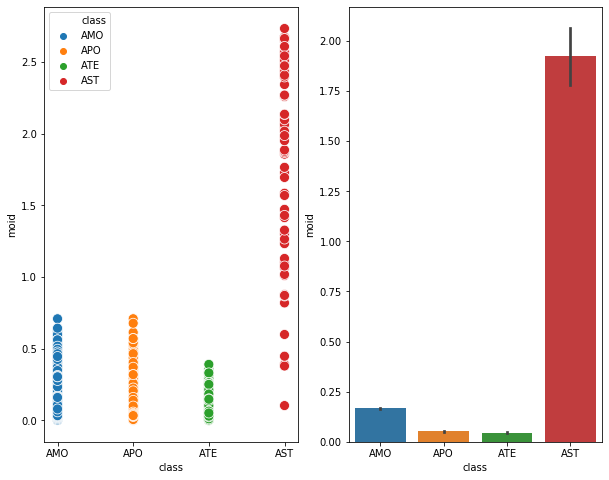

In [27]:
f,ax = plt.subplots(1,2,figsize=(10,8))
n = sns.scatterplot(df_new["class"],df_new["moid"],hue=df_new["class"],s=100,ax=ax[0]) #scatter plot
n = sns.barplot(df_new["class"],df_new["moid"],ax=ax[1])  #Bar plot
plt.show()

Now we have to do the pairplot among the classes which we want to classify with respect to the one type of features

There are two types of features, such as astronomical data features

and other are the features by observations.

<Figure size 2160x2160 with 0 Axes>

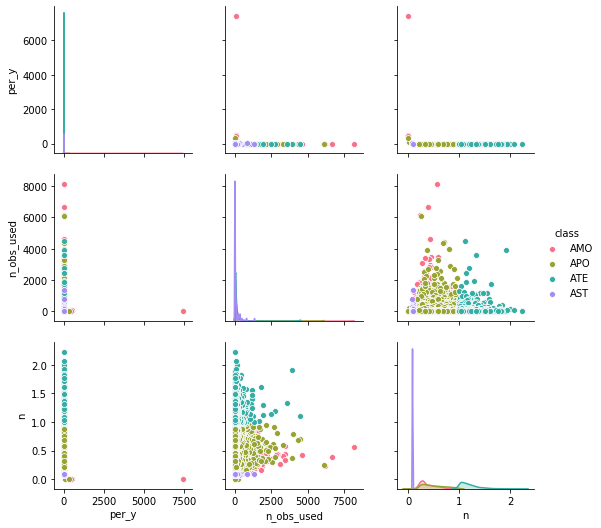

In [28]:
# pairplot With observation features

plt.figure(figsize=(30,30))
n = sns.pairplot(df_new[["per_y","n_obs_used","n","class"]],hue="class",palette="husl")
plt.show()

From this we can not easily distinguish

In [29]:
df_new.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'per_y', 'data_arc', 'n_obs_used', 'H',
       'moid', 'class', 'n', 'ma'],
      dtype='object')

<Figure size 2160x2160 with 0 Axes>

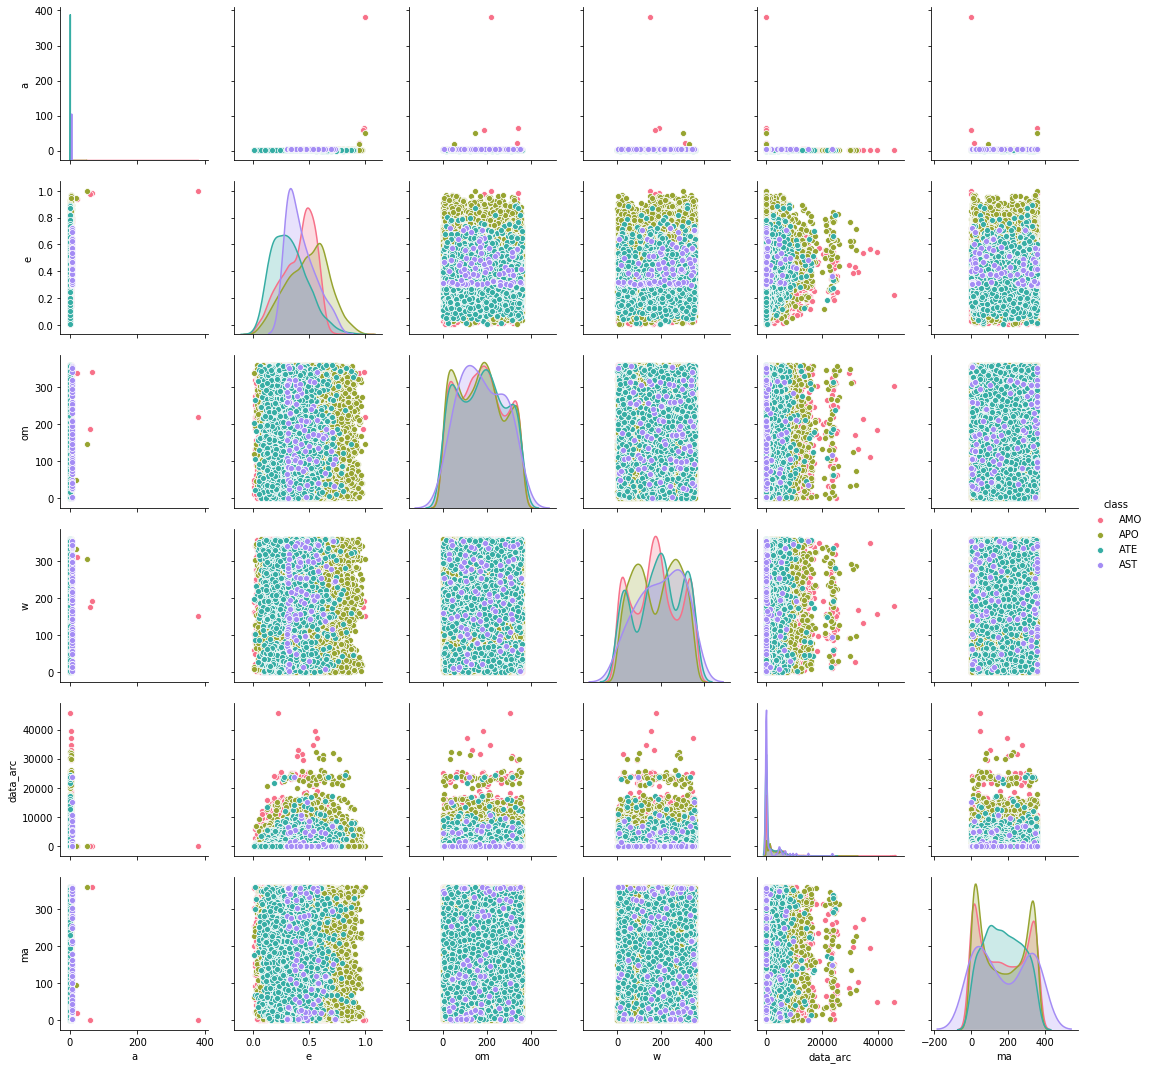

In [30]:
# Now the pairplot among the astronomical features except those which are related to earth and sun


plt.figure(figsize=(30,30))
n = sns.pairplot(df_new[["a","e","om","w","data_arc","ma","class"]],hue="class",palette="husl")
plt.show()

This also cant give any clear solution

<Figure size 2160x2160 with 0 Axes>

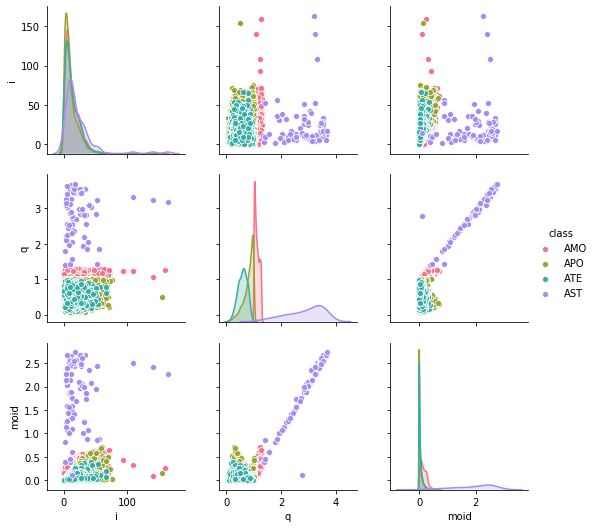

In [31]:
# pairplot With earth and sun related astronomical features

plt.figure(figsize=(30,30))
n = sns.pairplot(df_new[["i","q","moid","class"]],hue="class",palette="husl")
plt.show()

No clear indication

Now we have to plot the density graph of every class with respect to the features of the dataset

This Plot visualises the distribution of data over a continuous interval or time period. This also indicates that by per_y, a etc. each classes has a more or less same distribution which clearly indicates that those are important features but cannot by those classes can not be easily separable. 

One of the important features in this classification according to the other study is "eccentricity (e)", so we need to find how the different types of class behaves according to that features 

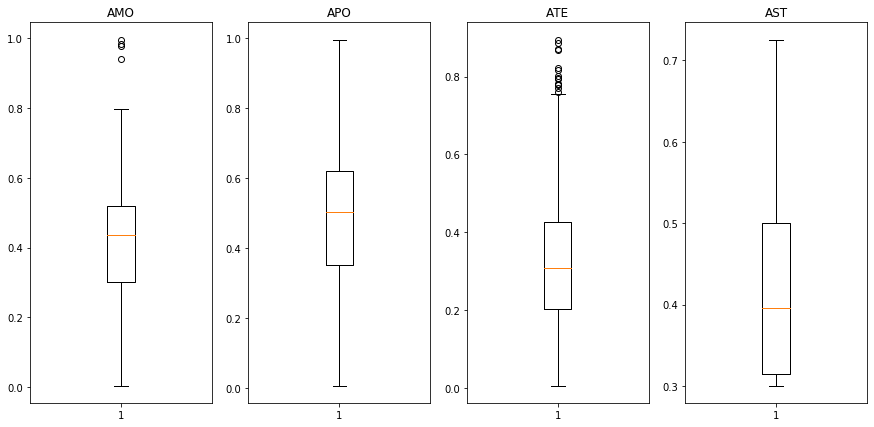

In [33]:
# plt.figure(figsize=(15,7))
f, [ax1, ax2, ax3, ax4] = plt.subplots(1,4, figsize = (15,7))
ax1.boxplot(df_new[df_new['class']=='AMO']['e'])
ax1.set_title("AMO")
ax2.boxplot(df_new[df_new['class']=='APO']['e'])
ax2.set_title("APO")
ax3.boxplot(df_new[df_new['class']=='ATE']['e'])
ax3.set_title("ATE")
ax4.boxplot(df_new[df_new['class']=='AST']['e'])
ax4.set_title("AST")
plt.show()


The distribution of AMO lie between 0.0 to 0.8, and also it has a positively-skewed outliers

The distribution of APO is totally uniform in the range 0.0 to 1.0 and also centered around 0.5

In the case of ATE follows a normal distribution centered at 0.3 but also has many data lies above the out-layers from 0.7 and above

AST follows an uniform distribution centered at the 0.4

All these based on the "Eccentricity" features

If we see the distribution based on the another important features "semi-major axis(a)" the distribution is totally different.

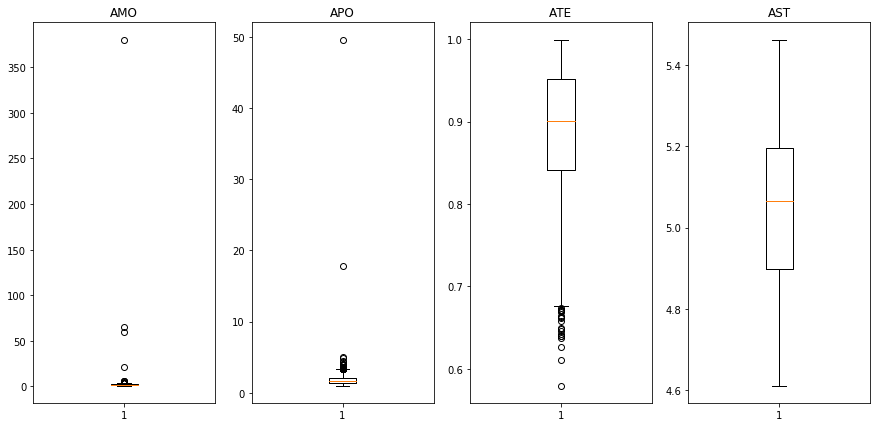

In [34]:
# plt.figure(figsize=(15,7))
f, [ax1, ax2, ax3, ax4] = plt.subplots(1,4, figsize = (15,7))
ax1.boxplot(df_new[df_new['class']=='AMO']['a'])
ax1.set_title("AMO")
ax2.boxplot(df_new[df_new['class']=='APO']['a'])
ax2.set_title("APO")
ax3.boxplot(df_new[df_new['class']=='ATE']['a'])
ax3.set_title("ATE")
ax4.boxplot(df_new[df_new['class']=='AST']['a'])
ax4.set_title("AST")
plt.show()


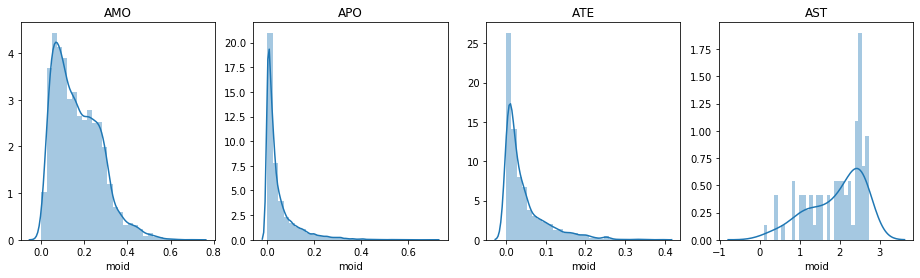

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16, 4))
ax = sns.distplot(df_new[df_new['class']=='AMO']['moid'], bins = 30, ax = axes[0], kde = True)
ax.set_title('AMO')
ax = sns.distplot(df_new[df_new['class']=='APO']['moid'], bins = 30, ax = axes[1], kde = True)
ax.set_title('APO')
ax = sns.distplot(df_new[df_new['class']=='ATE']['moid'], bins = 30, ax = axes[2], kde = True)
ax = ax.set_title('ATE')
ax = sns.distplot(df_new[df_new['class']=='AST']['moid'], bins = 30, ax = axes[3], kde = True)
ax = ax.set_title('AST')
plt.show()

"MOID" is a measure used to assess the potential close approaches and collision risk between two astronomical objects.
Here the MOID distance is taken from the distance from the earth. It is defined as the distance between the closest points of the osculating orbits of two bodies. 

So, "MOID" is a good estimation of how far away the asteroids being observed is from the Earth.

From the plot we can see that the first three types such as "AMO","APO","ATE" are near to the earth orbit while "AST" types are quite far from the earth orbit.

AST is oppositely skewed from the other types.

# Feature Engineering 

1. Principal Component Analysis

At first, we will do this analysis from the scratch
and later we will check if the values are correct by using sklearn.preprocessing library 

Seperate the features for the four classes

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
#Separate the features from the dataframe
AMOs = df_new[df_new['class'] == "AMO"]
APOs = df_new[df_new['class'] == "APO"]
ATEs = df_new[df_new['class'] == "ATE"]
ASTs = df_new[df_new['class'] == "AST"]


#Extracting the features


df_features_std = df_new[['a','e','i','om','w','q','per_y','data_arc','n_obs_used','H','moid','n','ma']].values

total_features = StandardScaler().fit_transform(df_features_std)

print(f'Shape of Asteroid features: {total_features.shape}')

Shape of Asteroid features: (21464, 13)


Step 1:
Extract the means of the features and create a mean vector.



In [38]:
means = np.zeros((13,1))
for i in range(13):
    means[i,0] = np.mean(total_features[:,i], axis=0)

print(f"Shape of means: {means.shape}")

Shape of means: (13, 1)


Step 2:
Subtract the mean vector from the array of all samples.

In [39]:
total_features -= means.T

Step 3:
Create the covariance matrix.

In [40]:
cov_mat = np.cov([total_features[:,i] for i in range(13)])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.00004659e+00  1.65190248e-01  7.84610039e-02  2.77737769e-03
  -4.54438466e-03  1.09322798e-01  9.69114726e-01  7.20092788e-04
   4.33605970e-03 -7.24738968e-02  1.02401749e-01 -2.08163096e-01
  -1.06954685e-02]
 [ 1.65190248e-01  1.00004659e+00 -2.20417245e-02 -2.10168765e-02
  -5.07151905e-03 -3.50922388e-01  4.00200990e-02  5.77649085e-02
   4.61117426e-02 -2.67242392e-01 -2.68182593e-03 -5.59477467e-01
  -7.19263908e-03]
 [ 7.84610039e-02 -2.20417245e-02  1.00004659e+00 -7.75376356e-03
   9.10652627e-03  7.35225196e-04  6.97371533e-02  1.65445853e-01
   9.97839318e-02 -4.51950492e-01  3.16804939e-01  4.25668012e-02
   8.50355179e-03]
 [ 2.77737769e-03 -2.10168765e-02 -7.75376356e-03  1.00004659e+00
  -3.49830380e-02  1.28064628e-02  3.68891063e-03  1.37383656e-02
   2.61266927e-02 -1.88995301e-02  1.40399020e-02  1.23560232e-02
   3.45286857e-04]
 [-4.54438466e-03 -5.07151905e-03  9.10652627e-03 -3.49830380e-02
   1.00004659e+00 -1.76787735e-02 -1.84519477e

Step 4:
Extract the eigenvectors and eigenvalues.

In [41]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [42]:
eigen_values

array([2.6341102 , 2.01325811, 1.68545423, 1.48234278, 0.01178828,
       0.04865955, 0.24719286, 0.47143949, 0.36347303, 0.91100154,
       1.09309479, 1.04783739, 0.99095343])

Let's look at the proportions of eigen value distribution amongst the features.

In [43]:
eigen_values_p = eigen_values/np.sum(eigen_values)
print(eigen_values_p)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

[0.20261442 0.15485879 0.12964429 0.11402106 0.00090675 0.00374287
 0.01901395 0.03626289 0.02795816 0.07007378 0.0840803  0.08059912
 0.07622364]


In [44]:
eigen_pairs.sort(key = lambda x: x[0], reverse=True)
eigen_pairs

[(2.634110202750129,
  array([-0.2346125 , -0.18034175, -0.28419154, -0.01482871,  0.02034719,
         -0.22721233, -0.17277947, -0.38036218, -0.3263948 ,  0.51241662,
         -0.38872196,  0.29035109, -0.01920031])),
 (2.013258113677636,
  array([-0.60626871, -0.11094467,  0.09521504,  0.01425505, -0.00128148,
         -0.10632583, -0.5855557 ,  0.30584012,  0.28281236, -0.20827321,
          0.00324375,  0.19635274,  0.03484899])),
 (1.685454232859637,
  array([-0.19337017, -0.28501481, -0.00773829,  0.00568503, -0.01293983,
          0.63596287, -0.24624164, -0.27201053, -0.2888655 ,  0.08634148,
          0.45047684, -0.21941407, -0.00845033])),
 (1.4823427801951536,
  array([-0.1682059 ,  0.66880611, -0.24485209, -0.05559444, -0.02302786,
         -0.10710793, -0.28225909, -0.12803114, -0.11877877, -0.03061227,
         -0.08439184, -0.57494833, -0.02375368])),
 (1.0930947857327515,
  array([-0.02907783,  0.06710015,  0.30890372, -0.33090565,  0.66176355,
         -0.11155595, -

Reshape our eigen vectors into (n,1) arrays.

In [45]:
eigen_vectors_final = np.hstack((eigen_pairs[0][1].reshape(-1,1), eigen_pairs[1][1].reshape(-1,1),
                                 eigen_pairs[2][1].reshape(-1,1),eigen_pairs[3][1].reshape(-1,1),eigen_pairs[4][1].reshape(-1,1)
                                ,eigen_pairs[5][1].reshape(-1,1),eigen_pairs[6][1].reshape(-1,1),eigen_pairs[7][1].reshape(-1,1)
                                ,eigen_pairs[8][1].reshape(-1,1),eigen_pairs[9][1].reshape(-1,1),eigen_pairs[10][1].reshape(-1,1)
                                ,eigen_pairs[11][1].reshape(-1,1),eigen_pairs[12][1].reshape(-1,1)))
eigen_vectors_final

array([[-2.34612497e-01, -6.06268712e-01, -1.93370167e-01,
        -1.68205896e-01, -2.90778329e-02,  4.18469162e-02,
         2.58490599e-02,  9.46238433e-03,  9.80523028e-03,
         1.76865502e-03, -5.05018516e-03,  1.22236879e-01,
         7.02345325e-01],
       [-1.80341748e-01, -1.10944673e-01, -2.85014811e-01,
         6.68806110e-01,  6.71001465e-02, -1.46073443e-01,
        -9.56505379e-02,  2.31945967e-02,  1.85415962e-01,
         1.83731493e-01, -2.18124084e-01,  5.02381614e-01,
        -1.51672148e-01],
       [-2.84191540e-01,  9.52150363e-02, -7.73829015e-03,
        -2.44852094e-01,  3.08903715e-01, -5.93497646e-01,
        -2.38482842e-01, -7.73111772e-02, -5.25539074e-01,
         6.30680747e-06, -2.41752421e-01,  6.73767129e-02,
        -2.16706795e-02],
       [-1.48287137e-02,  1.42550518e-02,  5.68502538e-03,
        -5.55944403e-02, -3.30905653e-01,  1.98163546e-01,
        -8.78365016e-01,  2.74806305e-01, -1.69210028e-02,
        -1.21658644e-02, -1.43468125e

In [46]:
final = eigen_vectors_final.T.dot(total_features.T)
final.T

array([[-1.87620682e+01,  1.52114675e+01, -1.33171221e+01, ...,
        -3.08197153e+00, -7.51926183e-01,  4.50323584e-02],
       [-9.28922264e+00,  5.77621158e+00, -4.77527921e+00, ...,
        -4.14661842e+00,  2.50076035e-01,  2.69937794e-02],
       [-8.01819637e+00,  5.06557892e+00, -4.61121207e+00, ...,
        -3.07343459e+00,  3.35904217e-01,  2.25188493e-02],
       ...,
       [ 2.30939307e-01, -1.04295805e+00,  1.02601233e+00, ...,
        -2.05420556e-01,  1.02301834e-01,  7.03148761e-03],
       [ 1.10753347e+00, -2.06408712e-01,  1.05512448e-01, ...,
         2.08360018e-01, -1.06694638e-01, -1.11036033e-02],
       [-2.63871236e+00,  1.07134612e+00, -1.82488333e+00, ...,
        -1.83160250e+00,  2.99812505e-01,  6.53322851e-02]])

PCA checking

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
#total_features = df_new[['a','e','i','om','w','q','per_y','data_arc','n_obs_used','H','moid','n','ma']].values

#df_features_std = StandardScaler().fit_transform(total_features )


In [49]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(total_features)
principalComponents

array([[ 1.87620682e+01, -1.52114675e+01,  1.33171221e+01, ...,
         3.08197153e+00, -7.51926183e-01,  4.50323584e-02],
       [ 9.28922264e+00, -5.77621158e+00,  4.77527921e+00, ...,
         4.14661842e+00,  2.50076035e-01,  2.69937794e-02],
       [ 8.01819637e+00, -5.06557892e+00,  4.61121207e+00, ...,
         3.07343459e+00,  3.35904217e-01,  2.25188493e-02],
       ...,
       [-2.30939307e-01,  1.04295805e+00, -1.02601233e+00, ...,
         2.05420556e-01,  1.02301834e-01,  7.03148761e-03],
       [-1.10753347e+00,  2.06408712e-01, -1.05512448e-01, ...,
        -2.08360018e-01, -1.06694638e-01, -1.11036033e-02],
       [ 2.63871236e+00, -1.07134612e+00,  1.82488333e+00, ...,
         1.83160250e+00,  2.99812505e-01,  6.53322851e-02]])

Things look good! Our eigen vectors are of the same magnitude. It may noticable that the some of eigen vector has opposite signs as to our sign but that's part of sci-kit learn's implementation.The signs do not have any effect on the variance of the vector because the span remains the same.

([<matplotlib.axis.XTick at 0x1a9b5757f28>,
 <a list of 13 Text xticklabel objects>)

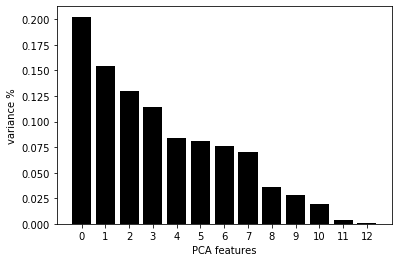

In [50]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

From this picture, we can see that there is no variance drop-off, so all the features are important here. So, any individual features can indentify that classes.

In [51]:
PCA_components = pd.DataFrame(principalComponents)

In [52]:
df_new1=df_new.copy()

In [53]:
df_new2=df_new[['class']]

In [54]:
df_new1

,a,e,i,om,w,q,per_y,data_arc,n_obs_used,H,moid,class,n,ma
432,1.458112,0.222736,10.828567,304.306263,178.821360,1.133339,1.760738,45762.0,8146,11.160,0.149341,AMO,0.559780,47.239460
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.286601,39478.0,1825,15.400,0.203359,AMO,0.229932,48.317252
886,2.476488,0.569116,9.384536,110.428481,350.414323,1.067080,3.897288,37095.0,1243,13.400,0.086571,AMO,0.252901,193.414345
1035,2.664145,0.533235,26.687613,215.557505,132.396356,1.243531,4.348556,34631.0,6153,9.450,0.343497,AMO,0.226656,274.156198
1220,1.919416,0.435321,11.876530,171.337230,26.674820,1.083854,2.659266,31628.0,467,17.700,0.107716,AMO,0.370638,250.280309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839698,0.968957,0.106548,26.928326,222.535034,319.535974,0.865717,0.953816,2.0,13,26.694,0.050395,ATE,1.033350,228.988188
839699,1.275189,0.389368,21.154860,43.357914,268.471700,0.778671,1.440025,2.0,17,25.493,0.042004,APO,0.684451,48.092958
839700,2.489182,0.537183,0.154366,181.040866,217.287538,1.152037,3.927292,2.0,15,24.729,0.159094,AMO,0.250968,1.913453
839701,1.412395,0.372764,6.167745,359.518341,328.781719,0.885906,1.678582,4.0,20,24.167,0.038303,APO,0.587178,34.515712


In [55]:
df_new

,a,e,i,om,w,q,per_y,data_arc,n_obs_used,H,moid,class,n,ma
432,1.458112,0.222736,10.828567,304.306263,178.821360,1.133339,1.760738,45762.0,8146,11.160,0.149341,AMO,0.559780,47.239460
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.286601,39478.0,1825,15.400,0.203359,AMO,0.229932,48.317252
886,2.476488,0.569116,9.384536,110.428481,350.414323,1.067080,3.897288,37095.0,1243,13.400,0.086571,AMO,0.252901,193.414345
1035,2.664145,0.533235,26.687613,215.557505,132.396356,1.243531,4.348556,34631.0,6153,9.450,0.343497,AMO,0.226656,274.156198
1220,1.919416,0.435321,11.876530,171.337230,26.674820,1.083854,2.659266,31628.0,467,17.700,0.107716,AMO,0.370638,250.280309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839698,0.968957,0.106548,26.928326,222.535034,319.535974,0.865717,0.953816,2.0,13,26.694,0.050395,ATE,1.033350,228.988188
839699,1.275189,0.389368,21.154860,43.357914,268.471700,0.778671,1.440025,2.0,17,25.493,0.042004,APO,0.684451,48.092958
839700,2.489182,0.537183,0.154366,181.040866,217.287538,1.152037,3.927292,2.0,15,24.729,0.159094,AMO,0.250968,1.913453
839701,1.412395,0.372764,6.167745,359.518341,328.781719,0.885906,1.678582,4.0,20,24.167,0.038303,APO,0.587178,34.515712


In [56]:
df_new1.rename({"class":"CLASS"},axis=1,inplace=True)
df_new1.CLASS[df_new1["CLASS"]=="AMO"]=0.0
df_new1.CLASS[df_new1["CLASS"]=="APO"]=1.0
df_new1.CLASS[df_new1["CLASS"]=="ATE"]=2.0
df_new1.CLASS[df_new1["CLASS"]=="AST"]=3.0
df_new1['CLASS'] = df_new1['CLASS'].astype('int')
y=df_new1["CLASS"]
df_new1.drop("CLASS",axis=1,inplace=True)
X=df_new1
df_new1.head()

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,a,e,i,om,w,q,per_y,data_arc,n_obs_used,H,moid,n,ma
432,1.458112,0.222736,10.828567,304.306263,178.821360,1.133339,1.760738,45762.0,8146,11.16,0.149341,0.559780,47.239460
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.286601,39478.0,1825,15.40,0.203359,0.229932,48.317252
886,2.476488,0.569116,9.384536,110.428481,350.414323,1.067080,3.897288,37095.0,1243,13.40,0.086571,0.252901,193.414345
1035,2.664145,0.533235,26.687613,215.557505,132.396356,1.243531,4.348556,34631.0,6153,9.45,0.343497,0.226656,274.156198
1220,1.919416,0.435321,11.876530,171.337230,26.674820,1.083854,2.659266,31628.0,467,17.70,0.107716,0.370638,250.280309


In [57]:
df_new

,a,e,i,om,w,q,per_y,data_arc,n_obs_used,H,moid,class,n,ma
432,1.458112,0.222736,10.828567,304.306263,178.821360,1.133339,1.760738,45762.0,8146,11.160,0.149341,AMO,0.559780,47.239460
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.286601,39478.0,1825,15.400,0.203359,AMO,0.229932,48.317252
886,2.476488,0.569116,9.384536,110.428481,350.414323,1.067080,3.897288,37095.0,1243,13.400,0.086571,AMO,0.252901,193.414345
1035,2.664145,0.533235,26.687613,215.557505,132.396356,1.243531,4.348556,34631.0,6153,9.450,0.343497,AMO,0.226656,274.156198
1220,1.919416,0.435321,11.876530,171.337230,26.674820,1.083854,2.659266,31628.0,467,17.700,0.107716,AMO,0.370638,250.280309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839698,0.968957,0.106548,26.928326,222.535034,319.535974,0.865717,0.953816,2.0,13,26.694,0.050395,ATE,1.033350,228.988188
839699,1.275189,0.389368,21.154860,43.357914,268.471700,0.778671,1.440025,2.0,17,25.493,0.042004,APO,0.684451,48.092958
839700,2.489182,0.537183,0.154366,181.040866,217.287538,1.152037,3.927292,2.0,15,24.729,0.159094,AMO,0.250968,1.913453
839701,1.412395,0.372764,6.167745,359.518341,328.781719,0.885906,1.678582,4.0,20,24.167,0.038303,APO,0.587178,34.515712


In [58]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,18.762068,-15.211467,13.317122,6.893685,6.495005,17.220753,5.741636,0.235387,7.900889,13.825463,3.081972,-0.751926,0.045032
1,9.289223,-5.776212,4.775279,1.595494,1.846766,6.328410,2.216183,0.689002,0.133158,-2.607906,4.146618,0.250076,0.026994
2,8.018196,-5.065579,4.611212,0.995210,0.556462,4.947122,2.732433,-1.183174,-0.463040,-4.118282,3.073435,0.335904,0.022519
3,16.632628,-11.198977,9.436515,4.086573,5.281529,10.925133,4.763787,-0.358466,5.992107,10.625276,2.184435,-0.260928,0.015765
4,5.411752,-3.621771,2.726124,1.165754,2.426756,2.505464,1.623728,0.600267,-0.957924,-5.090065,3.353650,0.189406,-0.012488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21459,-1.776373,-0.419382,-0.252747,2.554898,-0.871944,-0.596074,-0.485967,-1.152124,0.625576,0.101116,0.549463,-0.012520,0.057717
21460,-1.169735,0.080043,0.211178,0.465151,-1.843648,-0.302950,0.518265,0.517533,0.397257,0.151631,0.449541,-0.053397,-0.031364
21461,-0.230939,1.042958,-1.026012,-1.102485,-0.576327,1.437013,-0.223384,0.497120,-0.263764,0.113506,0.205421,0.102302,0.007031
21462,-1.107533,0.206409,-0.105512,0.220728,-0.821121,1.392326,-1.811144,-0.772373,-0.067495,-0.076862,-0.208360,-0.106695,-0.011104


In [59]:
df_new.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'per_y', 'data_arc', 'n_obs_used', 'H',
       'moid', 'class', 'n', 'ma'],
      dtype='object')

In [60]:
y['class'] =df_new['class']

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
y['class']

432       AMO
718       AMO
886       AMO
1035      AMO
1220      AMO
         ... 
839698    ATE
839699    APO
839700    AMO
839701    APO
839709    APO
Name: class, Length: 21464, dtype: object

In [62]:

y['class'] = y['class'].to_numpy()

In [63]:
y['class']

array(['AMO', 'AMO', 'AMO', ..., 'AMO', 'APO', 'APO'], dtype=object)

In [64]:
PCA_components['class']=y['class']

In [65]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,class
0,18.762068,-15.211467,13.317122,6.893685,6.495005,17.220753,5.741636,0.235387,7.900889,13.825463,3.081972,-0.751926,0.045032,AMO
1,9.289223,-5.776212,4.775279,1.595494,1.846766,6.328410,2.216183,0.689002,0.133158,-2.607906,4.146618,0.250076,0.026994,AMO
2,8.018196,-5.065579,4.611212,0.995210,0.556462,4.947122,2.732433,-1.183174,-0.463040,-4.118282,3.073435,0.335904,0.022519,AMO
3,16.632628,-11.198977,9.436515,4.086573,5.281529,10.925133,4.763787,-0.358466,5.992107,10.625276,2.184435,-0.260928,0.015765,AMO
4,5.411752,-3.621771,2.726124,1.165754,2.426756,2.505464,1.623728,0.600267,-0.957924,-5.090065,3.353650,0.189406,-0.012488,AMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21459,-1.776373,-0.419382,-0.252747,2.554898,-0.871944,-0.596074,-0.485967,-1.152124,0.625576,0.101116,0.549463,-0.012520,0.057717,ATE
21460,-1.169735,0.080043,0.211178,0.465151,-1.843648,-0.302950,0.518265,0.517533,0.397257,0.151631,0.449541,-0.053397,-0.031364,APO
21461,-0.230939,1.042958,-1.026012,-1.102485,-0.576327,1.437013,-0.223384,0.497120,-0.263764,0.113506,0.205421,0.102302,0.007031,AMO
21462,-1.107533,0.206409,-0.105512,0.220728,-0.821121,1.392326,-1.811144,-0.772373,-0.067495,-0.076862,-0.208360,-0.106695,-0.011104,APO


This is our final dataset...on which we can easily perform our machine-learning and deep learning techniques

# Machine learning model 

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
pca_final=PCA_components.copy()

In [68]:
x=pca_final[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
y=pca_final[['class']]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [70]:
def train_model(model,X_train, y_train, X_test,y_test):
    
    start_time = time.time()
    model.fit(X_train, y_train)
    
    delta_time = (time.time() - start_time)
    y_predict = model.predict(X_test)
    acc_model = accuracy_score(y_test, y_predict)
    prec_model = precision_score(y_test, y_predict,average= None)
    recall_model = recall_score(y_test, y_predict,average= None)
    log = np.array([[acc_model,prec_model[0],prec_model[1],prec_model[2],prec_model[3],recall_model[0],recall_model[1],recall_model[2],recall_model[3],delta_time]])
    
    print("training time: {0}".format(delta_time))
    print("accuracy: {0}".format(acc_model))
    print("\nconfusion matrix: ")
    print("-----------------------")
    print(confusion_matrix(y_test, y_predict))
    target_names = ['AMO', 'APO', 'ATE', 'AST']
    print("\nclassification report:")
    print("-----------------------")
    print(classification_report(y_test, y_predict,target_names=target_names))
       
    return model, log

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [72]:
from sklearn.linear_model import LogisticRegression
import time
Log_model = LogisticRegression(C=0.001, solver='lbfgs', multi_class='auto')
Log_model, model_log = (train_model(Log_model,x_train, y_train, x_test,y_test))

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training time: 0.49015331268310547
accuracy: 0.887724202189611

confusion matrix: 
-----------------------
[[1355  256    0    0]
 [  38 2319    0    0]
 [  17    0    0    0]
 [   0  171    0  137]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.96      0.84      0.90      1611
         APO       0.84      0.98      0.91      2357
         ATE       0.00      0.00      0.00        17
         AST       1.00      0.44      0.62       308

    accuracy                           0.89      4293
   macro avg       0.70      0.57      0.61      4293
weighted avg       0.90      0.89      0.88      4293



c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
Grad_model = GradientBoostingClassifier()

In [75]:
Grad_model,log = train_model(Grad_model,x_train, y_train, x_test,y_test)
model_log= np.append(model_log,log,axis=0)

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training time: 10.13196873664856
accuracy: 0.95574190542744

confusion matrix: 
-----------------------
[[1512   98    1    0]
 [  60 2285    1   11]
 [   1    0   16    0]
 [   0   18    0  290]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.96      0.94      0.95      1611
         APO       0.95      0.97      0.96      2357
         ATE       0.89      0.94      0.91        17
         AST       0.96      0.94      0.95       308

    accuracy                           0.96      4293
   macro avg       0.94      0.95      0.94      4293
weighted avg       0.96      0.96      0.96      4293



In [76]:
from sklearn.svm import SVC
SVC_model= SVC(C=20, degree=3, gamma=0.001, kernel='rbf')

In [77]:
SVC_model,log = train_model(SVC_model,x_train, y_train, x_test,y_test)
model_log= np.append(model_log,log,axis=0)

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training time: 3.7847328186035156
accuracy: 0.9829955741905427

confusion matrix: 
-----------------------
[[1563   48    0    0]
 [  13 2344    0    0]
 [   1    0   16    0]
 [   0   11    0  297]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.99      0.97      0.98      1611
         APO       0.98      0.99      0.98      2357
         ATE       1.00      0.94      0.97        17
         AST       1.00      0.96      0.98       308

    accuracy                           0.98      4293
   macro avg       0.99      0.97      0.98      4293
weighted avg       0.98      0.98      0.98      4293



In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=25, metric='manhattan')
knn_model,log = train_model(knn_model,x_train, y_train, x_test,y_test)
model_log= np.append(model_log,log,axis=0)

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


training time: 0.12286806106567383
accuracy: 0.9284882366643373

confusion matrix: 
-----------------------
[[1446  165    0    0]
 [  95 2260    0    2]
 [   2    0   15    0]
 [   0   43    0  265]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.94      0.90      0.92      1611
         APO       0.92      0.96      0.94      2357
         ATE       1.00      0.88      0.94        17
         AST       0.99      0.86      0.92       308

    accuracy                           0.93      4293
   macro avg       0.96      0.90      0.93      4293
weighted avg       0.93      0.93      0.93      4293



In [80]:
from sklearn.ensemble import RandomForestClassifier
rand_model=RandomForestClassifier(n_estimators=15)

In [81]:
rand_model,log = train_model(rand_model,x_train, y_train, x_test,y_test)
model_log= np.append(model_log,log,axis=0)

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


training time: 0.72231125831604
accuracy: 0.9410668530165386

confusion matrix: 
-----------------------
[[1491  120    0    0]
 [  96 2252    0    9]
 [   0    0   17    0]
 [   0   28    0  280]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.94      0.93      0.93      1611
         APO       0.94      0.96      0.95      2357
         ATE       1.00      1.00      1.00        17
         AST       0.97      0.91      0.94       308

    accuracy                           0.94      4293
   macro avg       0.96      0.95      0.95      4293
weighted avg       0.94      0.94      0.94      4293



In [82]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [83]:
dec_tree,log = train_model(dec_tree,x_train, y_train, x_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 0.19945549964904785
accuracy: 0.8332168646634055

confusion matrix: 
-----------------------
[[1105  500    0    6]
 [  31 2297    0   29]
 [   1    0   16    0]
 [   0  149    0  159]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.97      0.69      0.80      1611
         APO       0.78      0.97      0.87      2357
         ATE       1.00      0.94      0.97        17
         AST       0.82      0.52      0.63       308

    accuracy                           0.83      4293
   macro avg       0.89      0.78      0.82      4293
weighted avg       0.86      0.83      0.83      4293



In [84]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()

In [85]:
naive_model,log = train_model(naive_model,x_train, y_train, x_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 0.05086207389831543
accuracy: 0.7167481947356161

confusion matrix: 
-----------------------
[[ 593 1017    1    0]
 [  96 2246    2   13]
 [   1    0   16    0]
 [   2   84    0  222]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.86      0.37      0.51      1611
         APO       0.67      0.95      0.79      2357
         ATE       0.84      0.94      0.89        17
         AST       0.94      0.72      0.82       308

    accuracy                           0.72      4293
   macro avg       0.83      0.75      0.75      4293
weighted avg       0.76      0.72      0.69      4293



c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [87]:
model_xgb = XGBClassifier()

In [88]:
model_xgb,log = train_model(model_xgb,x_train, y_train, x_test,y_test)
model_log= np.append(model_log,log,axis=0)

c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\anish\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training time: 11.770632266998291
accuracy: 0.9520149079897507

confusion matrix: 
-----------------------
[[1506  105    0    0]
 [  61 2286    0   10]
 [   1    0   16    0]
 [   0   29    0  279]]

classification report:
-----------------------
              precision    recall  f1-score   support

         AMO       0.96      0.93      0.95      1611
         APO       0.94      0.97      0.96      2357
         ATE       1.00      0.94      0.97        17
         AST       0.97      0.91      0.93       308

    accuracy                           0.95      4293
   macro avg       0.97      0.94      0.95      4293
weighted avg       0.95      0.95      0.95      4293



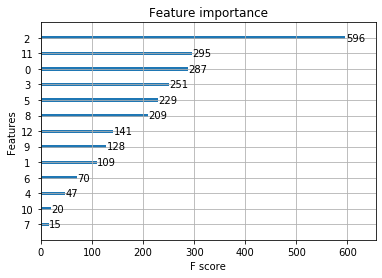

In [89]:
plot_importance(model_xgb)
plt.show()

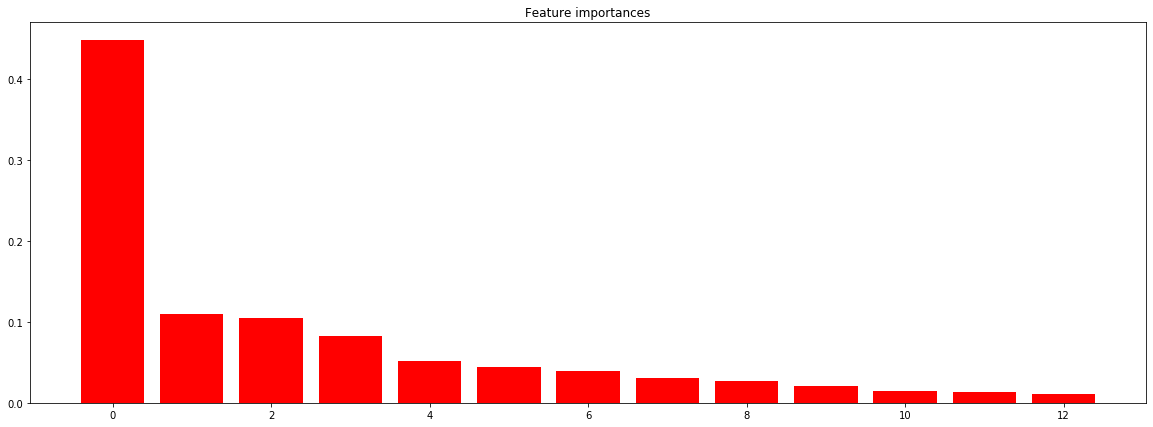

In [90]:
importances = rand_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,7))
plt.title("Feature importances")
ax = plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")

plt.show()

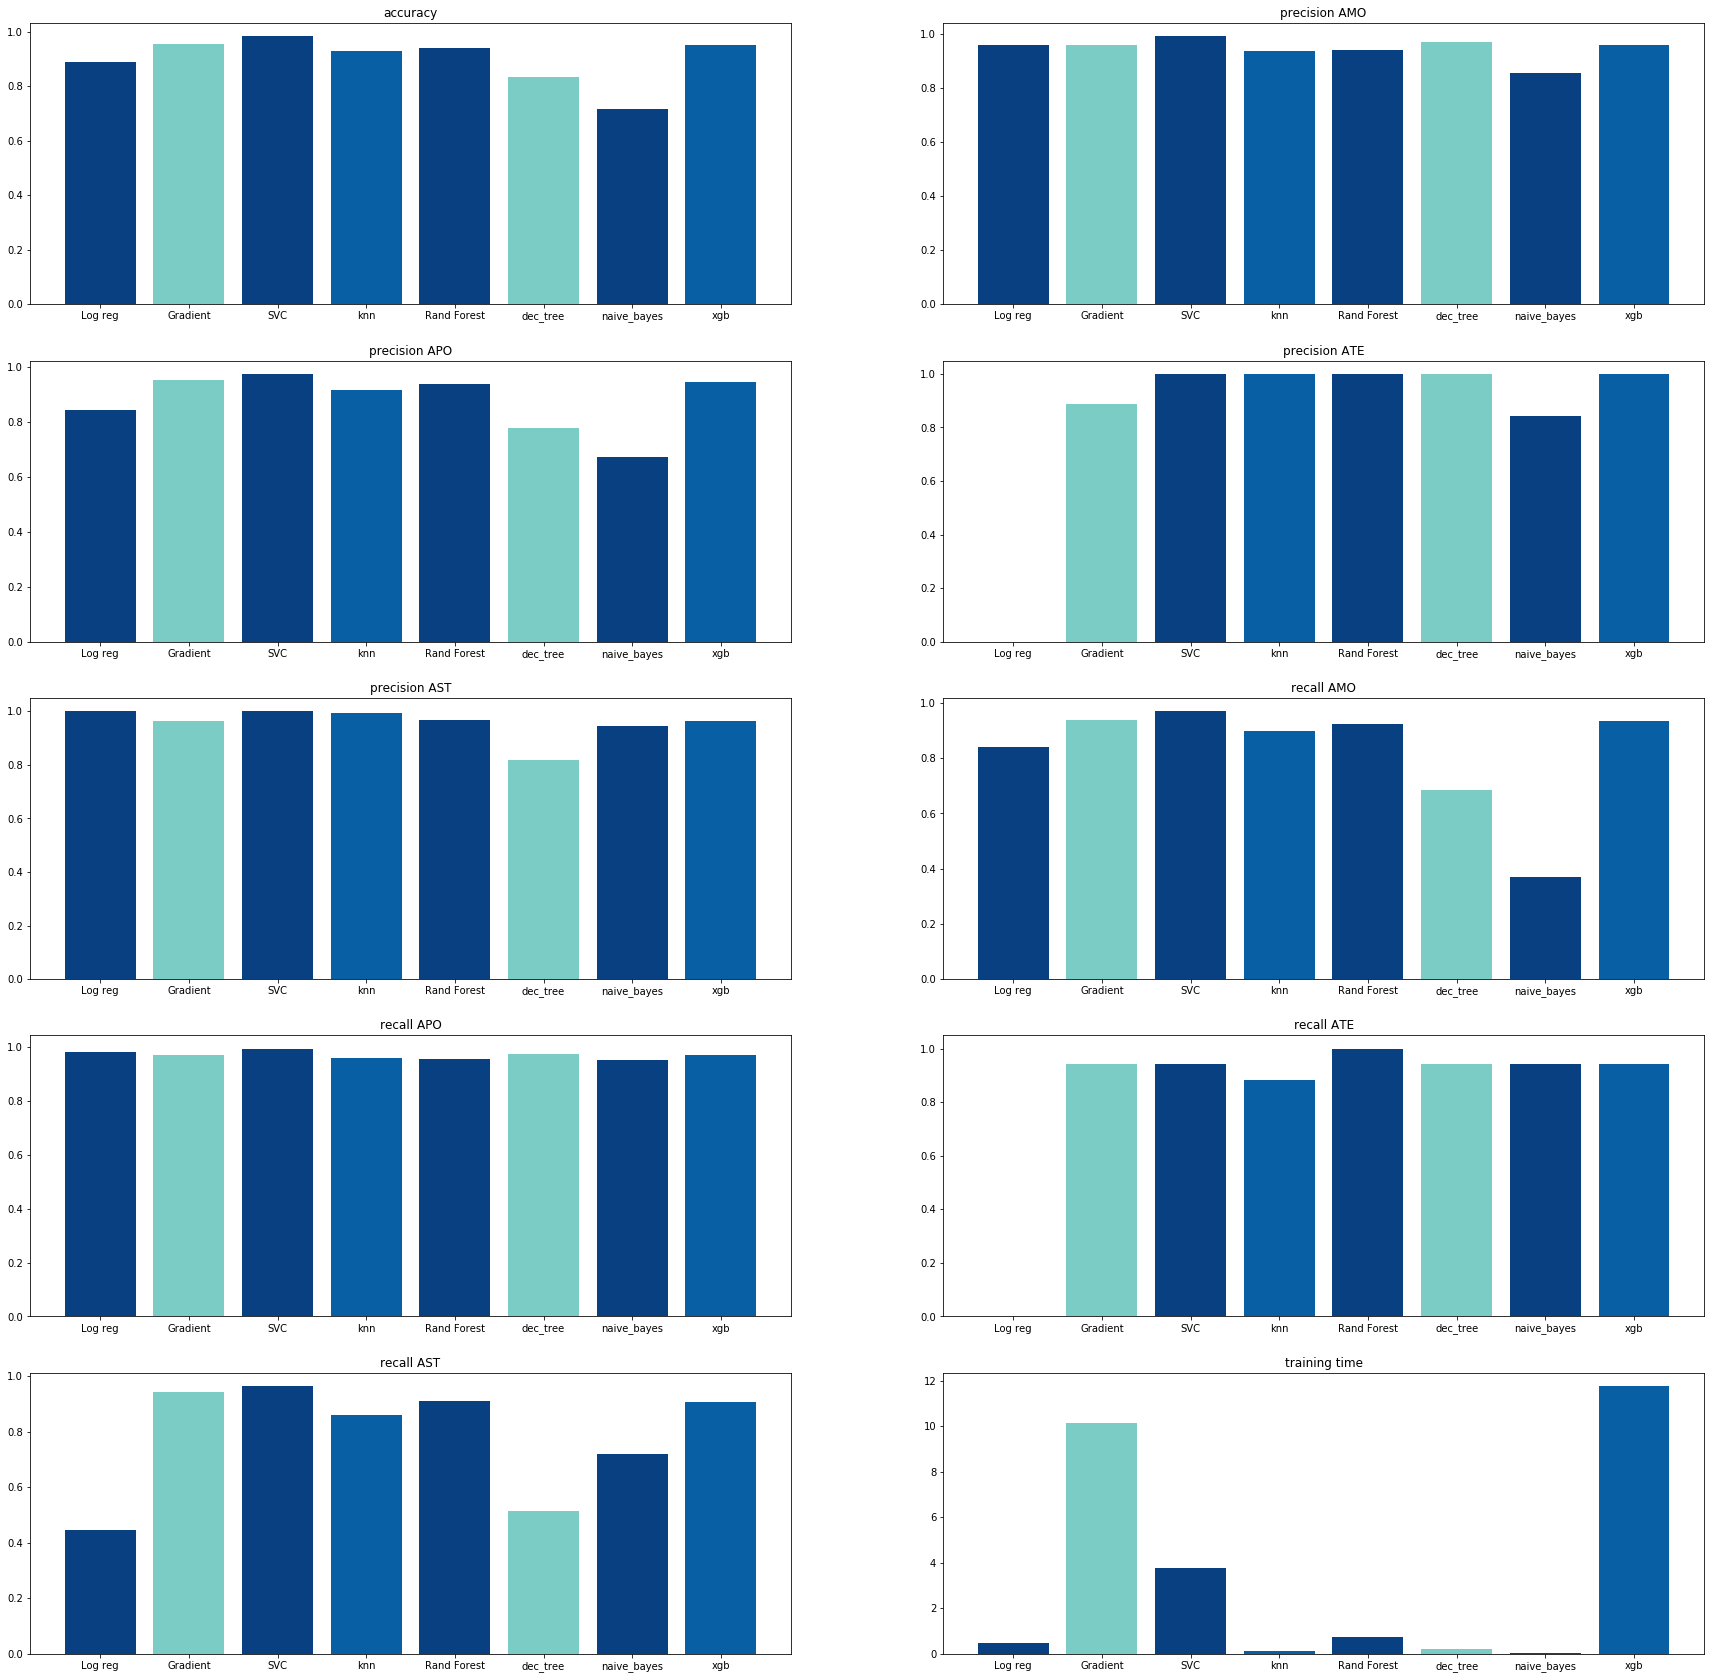

In [91]:
model_names = ('Log reg','Gradient','SVC','knn','Rand Forest','dec_tree','naive_bayes','xgb')
column_names = ('accuracy','precision AMO','precision APO','precision ATE','precision AST','recall AMO','recall APO','recall ATE','recall AST','training time')

plt.figure(figsize=(30,30)) 
colors=[1000,500,1000,900]
colors = [x / max(colors) for x in colors]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(colors)
for i in range(0,10): 
    plt.subplot(5,2,i+1) 
    ax=plt.bar(x=model_names,height=model_log[:,i],color=colors)
    plt.title(column_names[i])
plt.show()

In [92]:
pd.DataFrame(data=model_log,index=model_names,columns=column_names)

,accuracy,precision AMO,precision APO,precision ATE,precision AST,recall AMO,recall APO,recall ATE,recall AST,training time
Log reg,0.887724,0.960993,0.844501,0.000000,1.000000,0.841092,0.983878,0.000000,0.444805,0.490153
Gradient,0.955742,0.961221,0.951687,0.888889,0.963455,0.938547,0.969453,0.941176,0.941558,10.131969
SVC,0.982996,0.991122,0.975447,1.000000,1.000000,0.970205,0.994485,0.941176,0.964286,3.784733
knn,0.928488,0.937135,0.915721,1.000000,0.992509,0.897579,0.958846,0.882353,0.860390,0.122868
Rand Forest,0.941067,0.939509,0.938333,1.000000,0.968858,0.925512,0.955452,1.000000,0.909091,0.722311
dec_tree,0.833217,0.971856,0.779701,1.000000,0.819588,0.685909,0.974544,0.941176,0.516234,0.199455
naive_bayes,0.716748,0.856936,0.671049,0.842105,0.944681,0.368094,0.952906,0.941176,0.720779,0.050862
xgb,0.952015,0.960459,0.944628,1.000000,0.965398,0.934823,0.969877,0.941176,0.905844,11.770632


# Using Neural Network

Now by neural network we are trying to achieve the accuracy

In [93]:
#Import necessary modules
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [94]:
#Transform numpy array
X = pca_final.iloc[:, :-1].to_numpy()
Y = pca_final['class'].to_numpy()
Y = Y.reshape(-1, 1)

In [95]:
# encode class values as integers
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y).toarray()

In [96]:
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, encoded_Y, test_size=0.20,random_state=10)

In [97]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size = 0.20,random_state=10)

In [98]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [99]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)

#Optimizer
adam = Adam(lr=1e-3, epsilon = 1e-8, beta_1 = .9, beta_2 = .999)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 2,548
Trainable params: 2,484
Non-trainable params: 64
___________________________________________________

In [101]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64, callbacks= [reduce_lr])

Train on 17171 samples, validate on 3434 samples
Epoch 1/100
17171/17171 [==============================] - 3s 167us/step - loss: 0.5142 - accuracy: 0.8060 - val_loss: 0.2079 - val_accuracy: 0.9400
Epoch 2/100
17171/17171 [==============================] - 0s 24us/step - loss: 0.1388 - accuracy: 0.9447 - val_loss: 0.1014 - val_accuracy: 0.9677
Epoch 3/100
17171/17171 [==============================] - 0s 23us/step - loss: 0.1066 - accuracy: 0.9562 - val_loss: 0.0841 - val_accuracy: 0.9683
Epoch 4/100
17171/17171 [==============================] - 0s 23us/step - loss: 0.0909 - accuracy: 0.9631 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 5/100
17171/17171 [==============================] - 0s 22us/step - loss: 0.0813 - accuracy: 0.9652 - val_loss: 0.0574 - val_accuracy: 0.9790
Epoch 6/100
17171/17171 [==============================] - 0s 24us/step - loss: 0.0711 - accuracy: 0.9714 - val_loss: 0.0539 - val_accuracy: 0.9776
Epoch 7/100
17171/17171 [==============================] - 0s 

Epoch 56/100
17171/17171 [==============================] - 1s 53us/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0095 - val_accuracy: 0.9971
Epoch 57/100
17171/17171 [==============================] - 1s 52us/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0089 - val_accuracy: 0.9971
Epoch 58/100
17171/17171 [==============================] - 1s 51us/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0089 - val_accuracy: 0.9974
Epoch 59/100
17171/17171 [==============================] - 0s 24us/step - loss: 0.0080 - accuracy: 0.9970 - val_loss: 0.0092 - val_accuracy: 0.9974
Epoch 60/100
17171/17171 [==============================] - 0s 23us/step - loss: 0.0075 - accuracy: 0.9971 - val_loss: 0.0088 - val_accuracy: 0.9974
Epoch 61/100
17171/17171 [==============================] - 0s 24us/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0092 - val_accuracy: 0.9968
Epoch 62/100
17171/17171 [==============================] - 0s 24us/step - loss: 0.0090 - accuracy: 0.9968

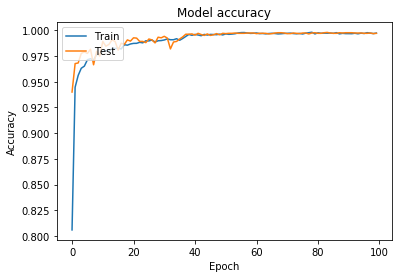

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

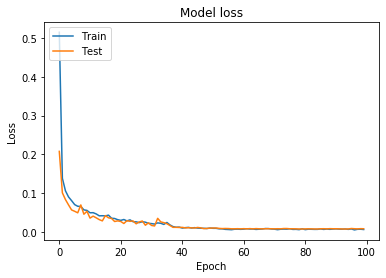

In [103]:

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

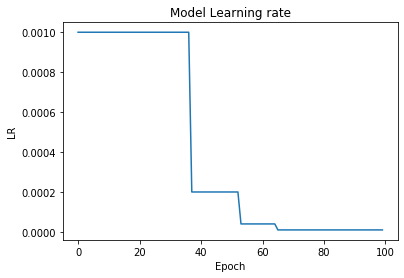

In [104]:
plt.plot(history.history['lr']) 
plt.title('Model Learning rate') 
plt.ylabel('LR') 
plt.xlabel('Epoch') 
plt.show()

In [105]:
Y_prob = model.predict(X_val) 
Y_classes = Y_prob.argmax(axis=-1)
Y_class = []
for i in range(len(Y_classes)):
    Y_class.append(encoder.categories_[0][Y_classes[i]])
Y_class = np.array(Y_class)
result = encoder.transform(Y_class.reshape(-1, 1)).toarray()

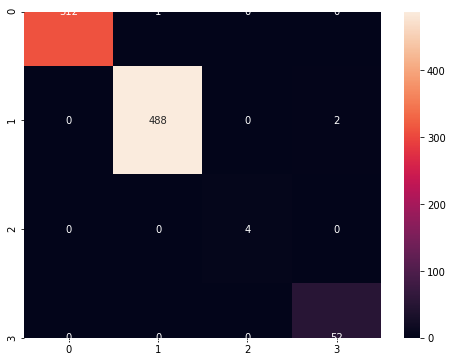

In [106]:
fig= plt.figure(figsize=(8,6))

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt="d")

In [107]:
acc = accuracy_score(Y_true, Y_pred_classes)
acc

0.9965075669383003